In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_file_path = '/content/drive/MyDrive/CMPE255/Assignment-6/Average Temperature 1900-2023.csv'

In [7]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
data = pd.read_csv(file_path)
data

,Year,Average_Fahrenheit_Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8
...,...,...
119,2019,53.5
120,2020,53.1
121,2021,54.5
122,2022,54.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

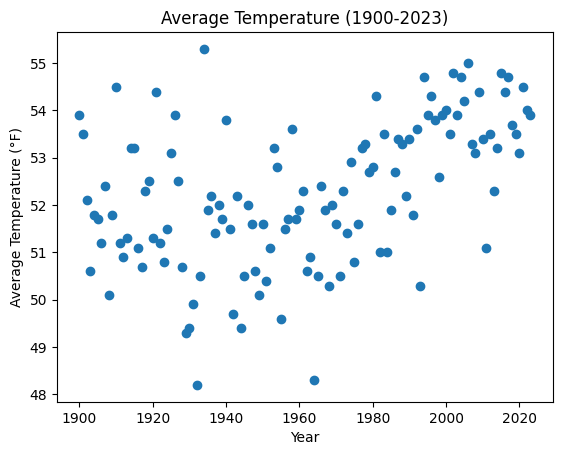

In [12]:
# Create a scatter plot
plt.scatter(data['Year'], data['Average_Fahrenheit_Temperature'])

# Adding title and labels
plt.title('Average Temperature (1900-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')

# Show the plot
plt.show()

# **Encode Categorical Values**
## Not all data can be presented as numbers in our data set. Furthermore, KMeans does not work with textual data therefore the data has to be encoded to numerical values. To elaborate, area and gender features are represented as text fields. We can use label encoders to convert text to numbers:

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Year','Average_Fahrenheit_Temperature']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
data['cluster']=y_predicted
data.head()

,Year,Average_Fahrenheit_Temperature,cluster
0,1900,53.9,0
1,1901,53.5,0
2,1902,52.1,0
3,1903,50.6,0
4,1904,51.8,0


In [17]:
km.cluster_centers_

array([[1920.        ,   51.82926829],
       [2003.        ,   53.44634146],
       [1961.5       ,   51.53095238]])

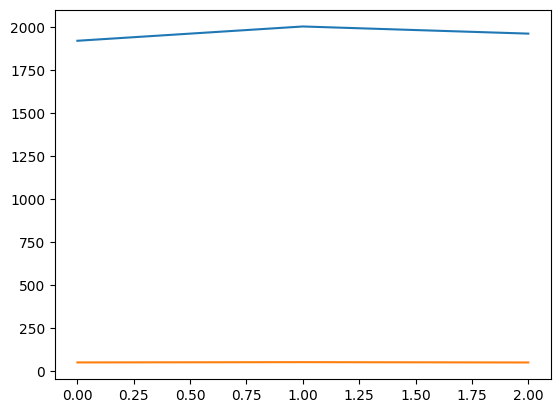

In [18]:
plt.plot(km.cluster_centers_)

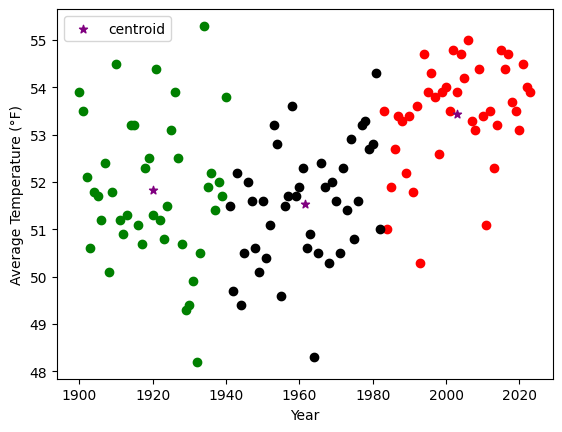

In [19]:
# Assuming y_predicted contains the KMeans cluster assignments
data['cluster'] = y_predicted

# Splitting the data into separate DataFrames based on cluster assignment
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

# Plotting the scatter plot for each cluster
plt.scatter(data1.Year, data1['Average_Fahrenheit_Temperature'], color='green')
plt.scatter(data2.Year, data2['Average_Fahrenheit_Temperature'], color='red')
plt.scatter(data3.Year, data3['Average_Fahrenheit_Temperature'], color='black')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

# Setting labels and legend
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.legend()

# Show the plot
plt.show()

# **Preprocessing using min max scaler**

In [20]:
scaler = MinMaxScaler()

scaler.fit(data[['Average_Fahrenheit_Temperature']])
data['Average_Fahrenheit_Temperature'] = scaler.transform(data[['Average_Fahrenheit_Temperature']])

scaler.fit(data[['Year']])
data['Year'] = scaler.transform(data[['Year']])

In [22]:
data.head()

,Year,Average_Fahrenheit_Temperature,cluster
0,0.00000,0.802817,0
1,0.00813,0.746479,0
2,0.01626,0.549296,0
3,0.02439,0.338028,0
4,0.03252,0.507042,0


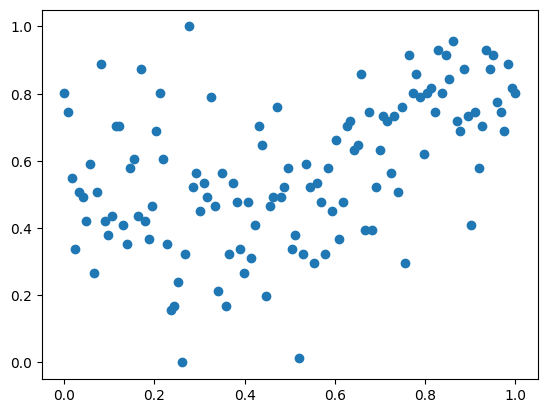

In [25]:
plt.scatter(data.Year,data['Average_Fahrenheit_Temperature'])

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Year','Average_Fahrenheit_Temperature']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
data['cluster']=y_predicted
data.head()

,Year,Average_Fahrenheit_Temperature,cluster
0,0.00000,0.802817,2
1,0.00813,0.746479,2
2,0.01626,0.549296,2
3,0.02439,0.338028,2
4,0.03252,0.507042,2


In [29]:
km.cluster_centers_

array([[0.46182828, 0.37753349],
       [0.80823613, 0.7519902 ],
       [0.15908592, 0.56452227]])

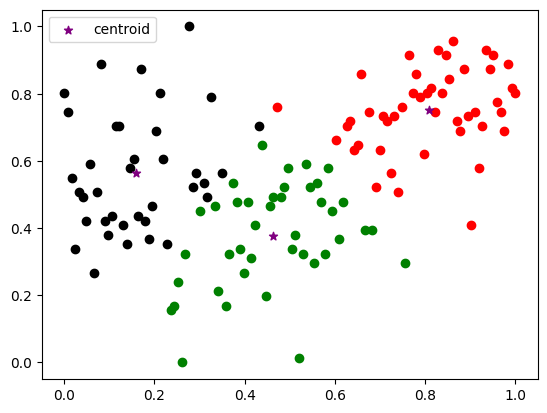

In [30]:
# Splitting the data into separate DataFrames based on cluster assignment
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

# Plotting the scatter plot for each cluster
plt.scatter(data1.Year, data1['Average_Fahrenheit_Temperature'], color='green')
plt.scatter(data2.Year, data2['Average_Fahrenheit_Temperature'], color='red')
plt.scatter(data3.Year, data3['Average_Fahrenheit_Temperature'], color='black')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

# Setting legend
plt.legend()

# Show the plot
plt.show()

# **Elbow Plot**
## The technique to determine K, the number of clusters, is called the elbow method.``

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Year','Average_Fahrenheit_Temperature']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

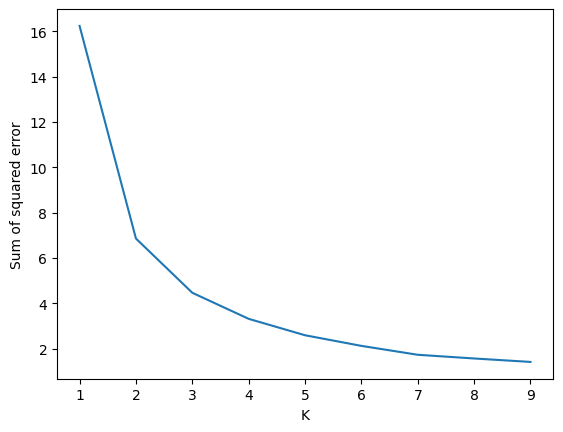

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)